In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)
os.getcwd()

'/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library'

In [2]:
from sclibrary import read_tntp, get_coordinates, SCPlot
import pandas as pd

data_folder = "data/transportation_networks"

def get_dataset_summary(dataset: str):
    network_data_path = f"{data_folder}/{dataset}/{dataset}_net.tntp"
    metadeta = pd.read_csv(network_data_path, sep="\t", header=None)

    number_of_zones = metadeta.iloc[0][0].split(" ")[-1]
    number_of_nodes = metadeta.iloc[1][0].split(" ")[-1]
    first_thru_node = metadeta.iloc[2][0].split(" ")[-1]
    number_of_links = metadeta.iloc[3][0].split(" ")[-1]
    features = metadeta.iloc[4].values[1:]

    return {
        "number_of_zones": number_of_zones,
        "number_of_nodes": number_of_nodes,
        "first_thru_node": first_thru_node,
        "number_of_links": number_of_links,
        "features": features
    }

def read_transportation_dataset(dataset: str):
    network_data_path = f"{data_folder}/{dataset}/{dataset}_net.tntp"
    
    print(get_dataset_summary(dataset=dataset))
    
    sc = read_tntp(
        filename=network_data_path,
        src_col="init_node",
        dest_col="term_node",
        skip_rows=8,
        delimeter="\t"
    ).to_simplicial_complex()
        
    return sc

In [3]:
dataset = "chicago-sketch"
data_folder = "data/transportation_networks"


sc = read_transportation_dataset(dataset=dataset)

# read the node coordinates
filename = f"{data_folder}/{dataset}/{dataset}_node.tntp"
coordinates = get_coordinates(
    filename=filename,
    node_id_col="node",
    x_col="X",
    y_col="Y",
    delimeter="\t",
)

{'number_of_zones': '387', 'number_of_nodes': '933', 'first_thru_node': '1', 'number_of_links': '2950', 'features': array(['tail node', 'head node', 'capacity (veh/h)', 'length (miles)',
       'fftt(min)', 'B', 'Power', 'speed limit (mph)', 'toll (cents)',
       'link type', nan], dtype=object)}


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


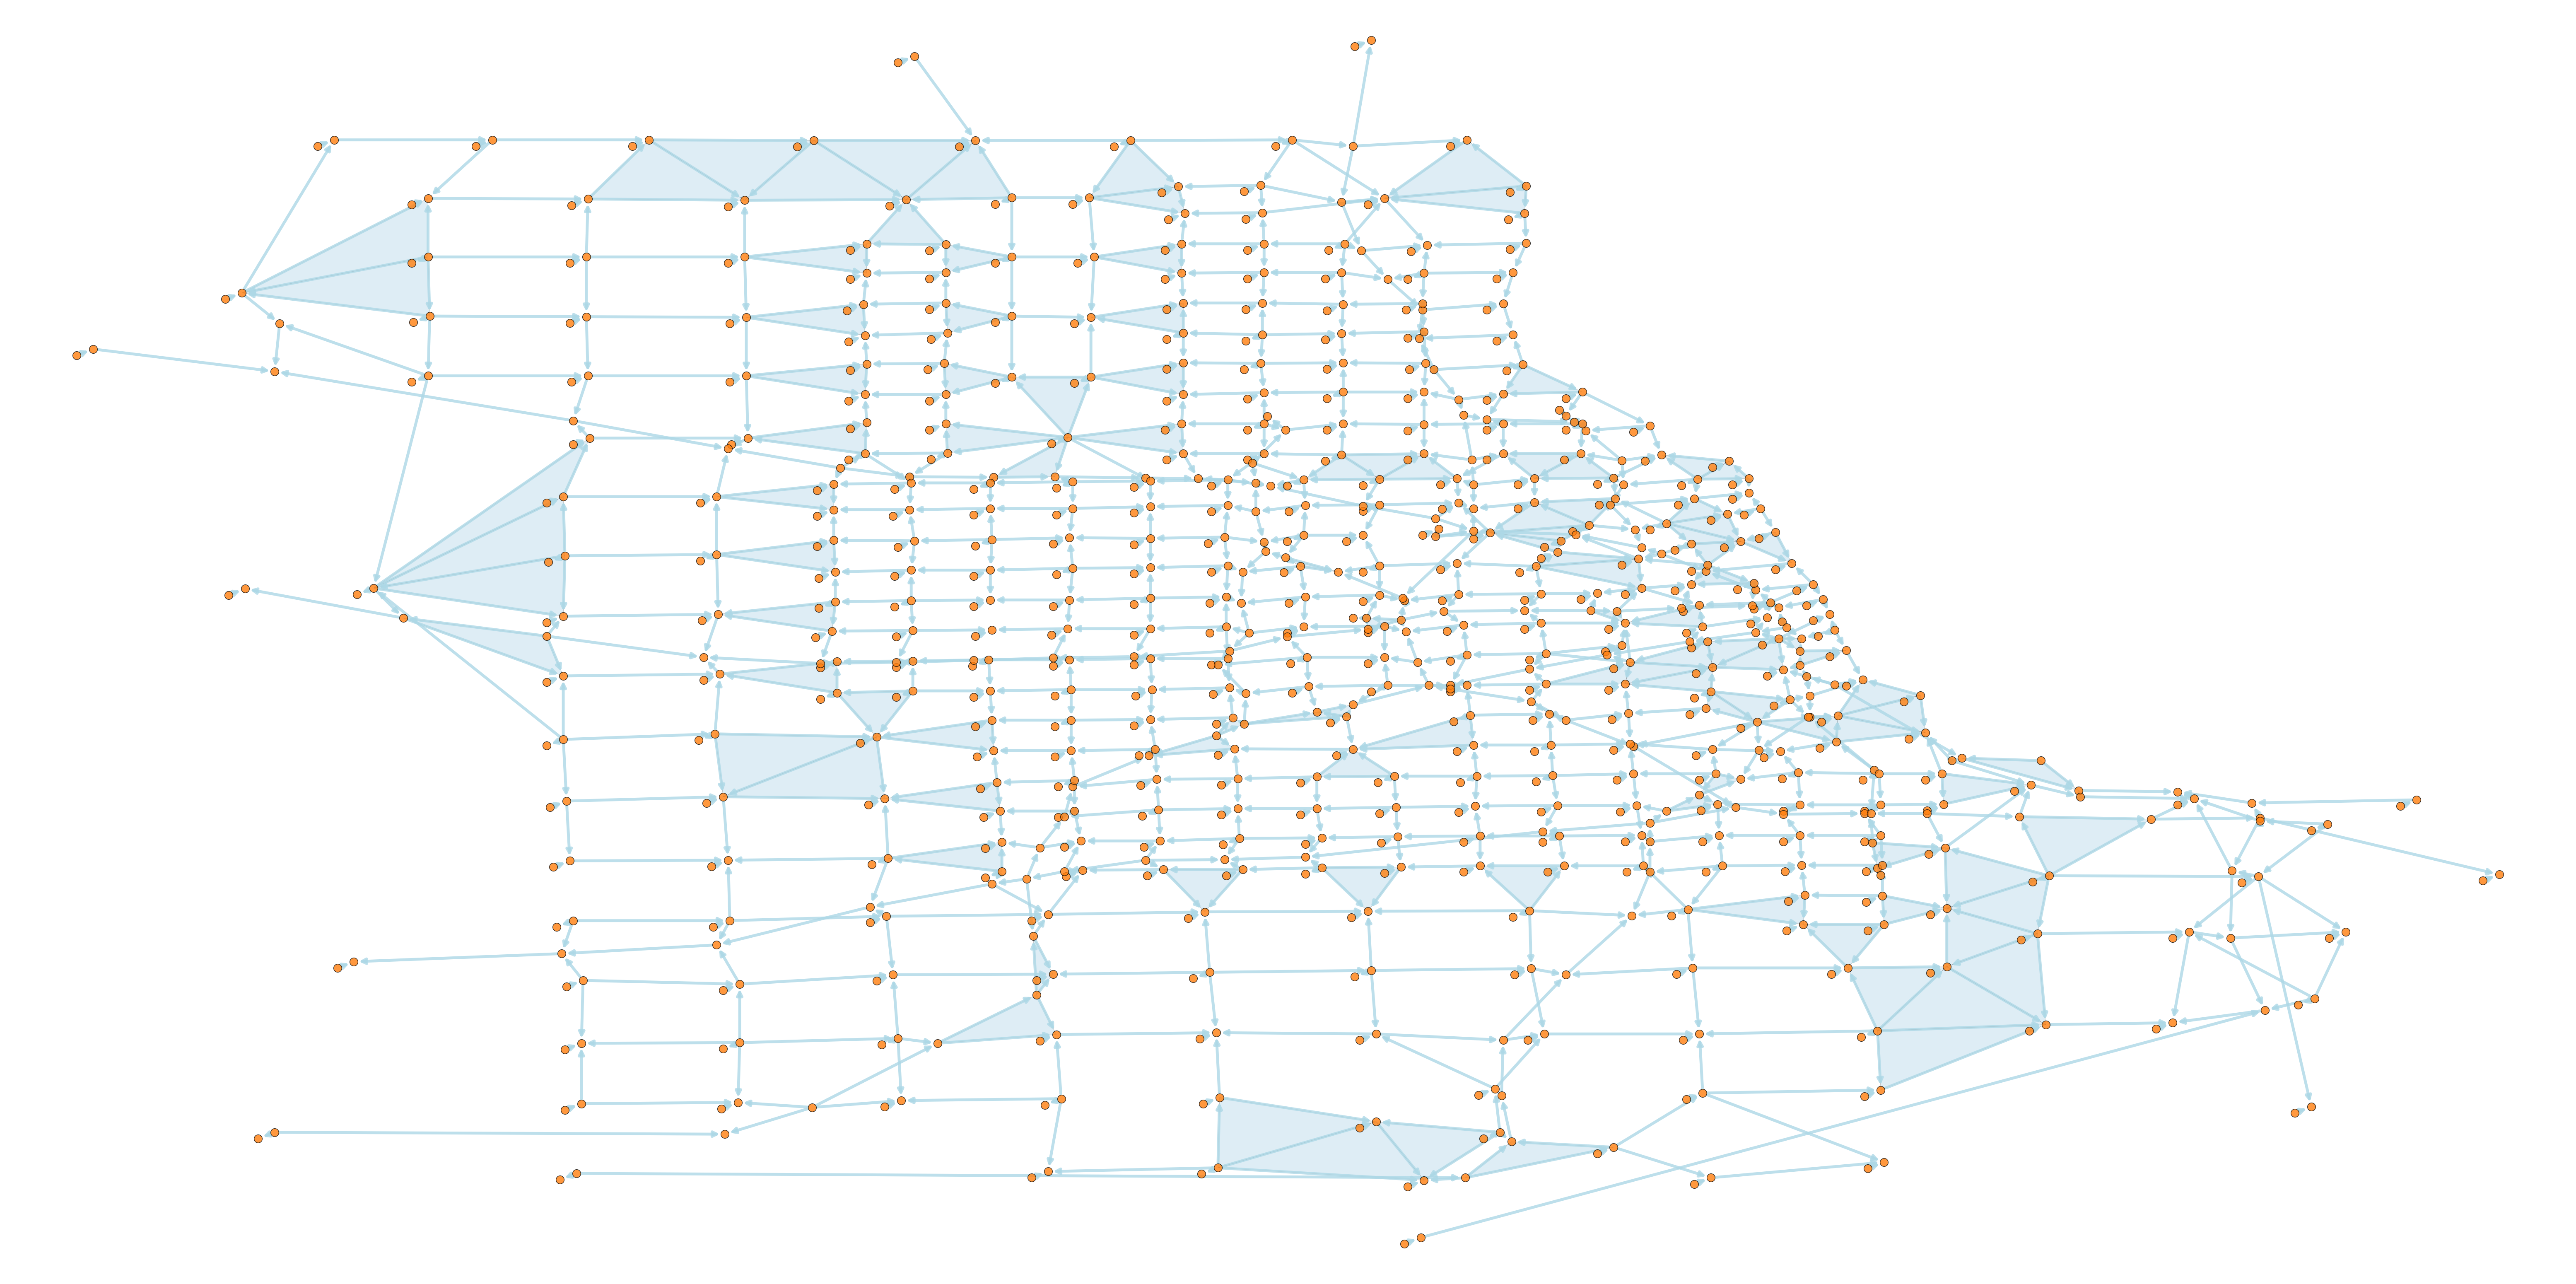

In [4]:
import matplotlib.pyplot as plt

scplot = SCPlot(simplical_complex=sc, coordinates=coordinates)

fig, ax = plt.subplots(1, 1, figsize=(80, 40))
scplot.draw_network(with_labels=False, node_size=200, arrowsize=20, ax=ax)